In [7]:
import numpy as np
import pandas as pd
import json

In [10]:
path = 'teden_07/data/DATA_01_bitly.txt'

In [11]:
with open(path) as f:
    line = f.readline()
    print(line)

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [12]:
records = [json.loads(line) for line in open(path)]

In [13]:
frame = pd.DataFrame(records)

In [14]:
cframe = frame[frame['a'].notnull()].copy()

In [15]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [16]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [20]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [28]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os                              Not Windows  Windows
tz                                                  
                                      245.0    276.0
Africa/Cairo                            0.0      3.0
Africa/Casablanca                       0.0      1.0
Africa/Ceuta                            0.0      2.0
Africa/Johannesburg                     0.0      1.0
Africa/Lusaka                           0.0      1.0
America/Anchorage                       4.0      1.0
America/Argentina/Buenos_Aires          1.0      0.0
America/Argentina/Cordoba               0.0      1.0
America/Argentina/Mendoza               0.0      1.0

In [27]:
indexer = agg_counts.sum(1).argsort()

In [29]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [30]:
count_subset = agg_counts.take(indexer[:10])

In [31]:
count_subset

os                 Not Windows  Windows
tz                                     
America/Mazatlan           1.0      0.0
America/La_Paz             0.0      1.0
America/Lima               0.0      1.0
Europe/Volgograd           0.0      1.0
Europe/Sofia               0.0      1.0
Asia/Manila                0.0      1.0
Asia/Nicosia               0.0      1.0
Asia/Riyadh                0.0      1.0
America/Monterrey          1.0      0.0
Asia/Novosibirsk           0.0      1.0

In [32]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [33]:
count_subset = count_subset.stack()

In [34]:
count_subset.name = 'total'

In [35]:
count_subset = count_subset.reset_index()

In [36]:
count_subset[:10]

tz           os  total
0  America/Mazatlan  Not Windows    1.0
1  America/Mazatlan      Windows    0.0
2    America/La_Paz  Not Windows    0.0
3    America/La_Paz      Windows    1.0
4      America/Lima  Not Windows    0.0
5      America/Lima      Windows    1.0
6  Europe/Volgograd  Not Windows    0.0
7  Europe/Volgograd      Windows    1.0
8      Europe/Sofia  Not Windows    0.0
9      Europe/Sofia      Windows    1.0

In [39]:
import seaborn as sns

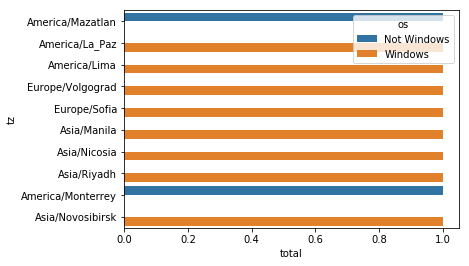

In [40]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

In [42]:
def norm_total(group):
    group['normed_total'] = group['total'] / group['total'].sum
    return group

In [44]:
results = count_subset.groupby('tz').apply(norm_total)

AssertionError: <class 'method'>

In [45]:
!head -n 10 teden_07/data/DATA_03_names/yob1880.txt

In [50]:
names1880 = pd.read_csv('teden_07/data/DATA_03_names/yob1880.txt', 
                       names=['name', 'sex', 'births'])

In [49]:
names1880.head()

name sex  births
0       Mary   F    7065
1       Anna   F    2604
2       Emma   F    2003
3  Elizabeth   F    1939
4     Minnie   F    1746

In [51]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [52]:
years = range(1880,2018)
pieces = []
columns = ['name', 'sex', 'births']

In [55]:
for year in years:
    path = f'teden_07/data/DATA_03_names/yob{year}.txt'
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [56]:
names = pd.concat(pieces, ignore_index=True)

In [57]:
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)

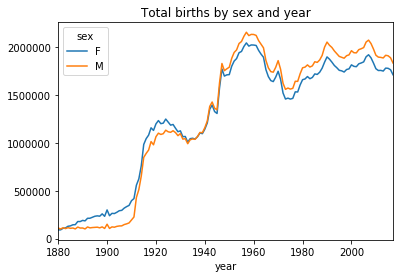

In [58]:
total_births.plot(title='Total births by sex and year')

In [59]:
def add_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

In [60]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [61]:
names.groupby(['year', 'sex'])['prop'].sum().head(8)

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
Name: prop, dtype: float64

In [62]:

def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [63]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [64]:
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [65]:
top1000.reset_index(inplace=True, drop=True)

In [66]:
top1000.head()

name sex  births  year      prop
0       Mary   F    7065  1880  0.077643
1       Anna   F    2604  1880  0.028618
2       Emma   F    2003  1880  0.022013
3  Elizabeth   F    1939  1880  0.021309
4     Minnie   F    1746  1880  0.019188

In [67]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
    top1000 = pd.concat(pieces, ignore_index=True)

In [68]:
boys = top1000[top1000['sex'] == 'M']

In [69]:
girls = top1000[top1000['sex'] == 'F']

In [70]:

total_births = top1000.pivot_table('births', index='year', 
                                   columns='name', aggfunc=sum)


In [71]:
total_births.head(10)

name  Aaden  Aadhya  Aaliyah  Aanya  Aarav  Aaron  Aarush   Ab  Abagail  Abb  \
year                                                                           
1880    NaN     NaN      NaN    NaN    NaN  102.0     NaN  NaN      NaN  NaN   
1881    NaN     NaN      NaN    NaN    NaN   94.0     NaN  NaN      NaN  NaN   
1882    NaN     NaN      NaN    NaN    NaN   85.0     NaN  NaN      NaN  NaN   
1883    NaN     NaN      NaN    NaN    NaN  105.0     NaN  NaN      NaN  NaN   
1884    NaN     NaN      NaN    NaN    NaN   97.0     NaN  NaN      NaN  NaN   
1885    NaN     NaN      NaN    NaN    NaN   88.0     NaN  6.0      NaN  NaN   
1886    NaN     NaN      NaN    NaN    NaN   86.0     NaN  NaN      NaN  NaN   
1887    NaN     NaN      NaN    NaN    NaN   78.0     NaN  NaN      NaN  NaN   
1888    NaN     NaN      NaN    NaN    NaN   90.0     NaN  NaN      NaN  NaN   
1889    NaN     NaN      NaN    NaN    NaN   85.0     NaN  NaN      NaN  NaN   

name  ...   Zoe  Zoey  Zoie  Zola  Zollie  Zona  Zora  Zula  Zuri  Zyaire  
year  ...                                                                  
1880  ...  23.0   NaN   NaN   7.0     NaN   8.0  28.0  27.0   NaN     NaN  
1881  ...  22.0   NaN   NaN  10.0     NaN   9.0  21.0  27.0   NaN     NaN  
1882  ...  25.0   NaN   NaN   9.0     NaN  17.0  32.0  21.0   NaN     NaN  
1883  ...  23.0   NaN   NaN  10.0     NaN  11.0  35.0  25.0   NaN     NaN  
1884  ...  31.0   NaN   NaN  14.0     6.0   8.0  58.0  27.0   NaN     NaN  
1885  ...  27.0   NaN   NaN  12.0     6.0  14.0  48.0  38.0   NaN     NaN  
1886  ...  25.0   NaN   NaN   8.0     NaN  20.0  52.0  43.0   NaN     NaN  
1887  ...  34.0   NaN   NaN  23.0     NaN  28.0  46.0  33.0   NaN     NaN  
1888  ...  42.0   NaN   NaN  23.0     7.0  30.0  42.0  45.0   NaN     NaN  
1889  ...  29.0   NaN   NaN  22.0     NaN  29.0  53.0  55.0   NaN     NaN  

[10 rows x 7134 columns]